<h1>Titanic Survival Prediction</h1>

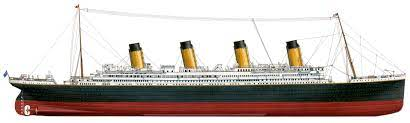

In [83]:
#import necessary libraries 

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display


In [84]:
# Load the data
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

<h3>Explore Dataset</h3>

In [4]:
#view 5 top rows of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#view 5 bottom rows of data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
#Find null columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Table Information

Variables(Columns) from the dataset:

- PassengerId
- Survived: 0 = No, 1 = Yes
- Pclass (ticket class and proxy for SES): 1 = 1st, 2 = 2nd, 3 = 3rd
- Name
- Sex: male, female
- Age (age in years)
- SibSp (# of siblings / spouses aboard)
- Parch (# of parents / children aboard)
- Ticket (ticket number)
- Fare (passenger fare in USD)
- Cabin (cabin number)
- Embarked (port of embarcation): C = Cherbourg, Q = Queenstown, S = Southampto
<br><b>There are total 891 entries.</b> <br>
<b>Null value contained colums: Age( 177 null values), Cabin (687 null values), Embarked(2 null values)</b>

In [37]:
#Find the number of unique values for each column to find potential categorial data
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<b>The columns: Survived, Pclass,Sex Embarked are categorial data</b>

<h2>EDA</h2>
- <b>Questions Worth Answering</b><br>
    - Was there a factor or combination of factors that effect the survival of the tragedy?<br>
    - We will condiser the follwing factors first <br>
    - Gender(Male/Female): Were there more women survived than men? <br>
    - Pclass passenger class ( 1st, 2nd, 3rd): Were 1st class passenger more survived than other classes? <br>
    - Age: Which age group were prioritized to be rescused(survived)?<br>
    - Sibling, Spouse : Were the people who had siblings or spouse more survived who did not have?<br>
    - Parents/Children : Were people with parents or children prioritized to be rescused( survived)?<br>

survived 342
Not survived 549


/Users/nawchittoojune/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


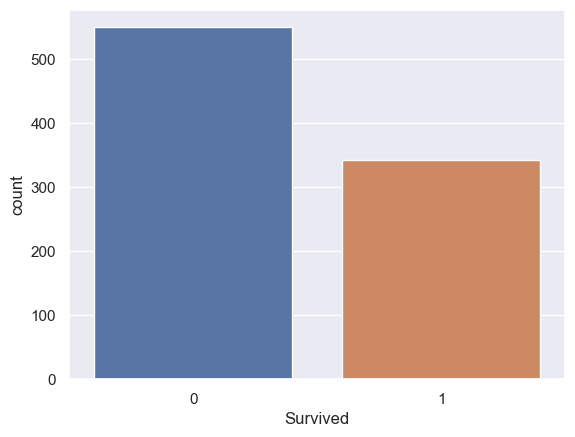

In [38]:
#Count and plot the number of Suvrvived and NOt survived people
sns.countplot('Survived',data=df)
survived = df['Survived'].value_counts()[1]
notSurvived = df['Survived'].value_counts()[0]
print("survived",survived)
print("Not survived",notSurvived)

plt.show()

<b> There are 345 people survived and 549 people were not survived</b>

<h3>Gender(Male/Female): Were there more women survived than men?</h3>

In [39]:
#First find unique value or confirm value
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [42]:
#Count male and feamle 
df.value_counts('Sex')

Sex
male      577
female    314
dtype: int64

In [43]:
df.value_counts(["Sex", "Survived"])

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

577
314


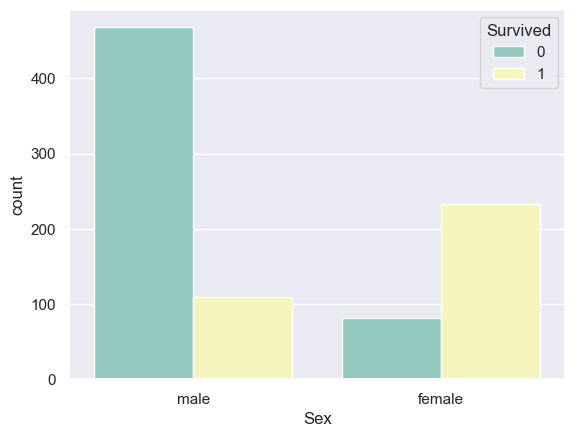

In [44]:
male= df[df.Sex == 'male']["Survived"]
female = df[df.Sex == 'female']["Survived"]
print(male.shape[0])
print(female.shape[0])

sns.countplot(x="Sex", hue="Survived", palette="Set3", data=df)
plt.show()


<h3>Gender(Male/Female): Were there more women survived than men?</h3><br>
-According to the data, 109 male survived out of 577, 233 female survived out of 317. Therefore, women were more survived than men. [Survived: 0 (not alived), 1(alived)]


<h3>Pclass passenger class ( 1st, 2nd, 3rd): Were 1st class passenger more survived than other classes?</h3><br>

- Pclass 1: First class. This class represents the highest socioeconomic status on the Titanic. Passengers in this class had access to the most luxurious accommodations and amenities.<br>

- Pclass 2: Second class. This class represents a middle-level socioeconomic status on the Titanic. Passengers in this class had relatively comfortable accommodations but not as lavish as those in first class.<br>

- Pclass 3: Third class. This class represents the lowest socioeconomic status on the Titanic. Passengers in this class had basic accommodations and shared common areas with other passengers.

In [47]:
df['Pclass'].unique()

array([3, 1, 2])

In [48]:
#Count classes
df.value_counts('Pclass')

Pclass
3    491
1    216
2    184
dtype: int64

From the output, we can see that the third class (Pclass 3) had the highest frequency with 491 passengers. The first class (Pclass 1) had 216 passengers, and the second class (Pclass 2) had 184 passengers. Therefore, based on the Titanic dataset, the most common passenger class was the third class.

In [50]:
df.groupby(['Survived', 'Pclass'])['Pclass'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

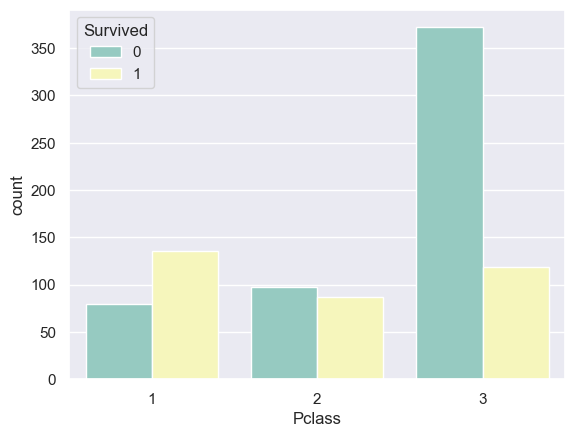

In [52]:
sns.countplot(x="Pclass", hue="Survived", palette="Set3", data=df)
plt.show()


<h3>Pclass passenger class ( 1st, 2nd, 3rd): Were 1st class passenger more survived than other classes?</h3><br>
    According to the output, 1st class passenger were more survived than other classes passenger

<h3>Age: Which age group were prioritized to be rescused(survived)?</h3><br>
- There are 177 null value in age column, Therefore, we will handle null value first

In [91]:
# Calculate median age by passenger class
median_age_by_class = df.groupby('Pclass')['Age'].median()


# Fill missing age values based on passenger class
df['Age'] = df.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.median()))

In [56]:
df['Age'].max()

80.0

In [57]:
df['Age'].min()

0.42

In [67]:
print(median_age_by_class)

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [64]:
# Define the age ranges
age_ranges = [0, 18, 30, 50, 80]

# Create a new column 'AgeRange' to categorize ages into ranges
df['AgeRange'] = pd.cut(df['Age'], bins=age_ranges)

# Count the number of passengers in each age range
age_range_counts = df['AgeRange'].value_counts().sort_index()

# Count the number of survivors (alive) in each age range
survived_counts = df[df['Survived'] == 1]['AgeRange'].value_counts().sort_index()

# Print the counts
print('Age Range Counts:')
print(age_range_counts)
print('\nSurvived Counts:')
print(survived_counts)


Age Range Counts:
(0, 18]     139
(18, 30]    417
(30, 50]    271
(50, 80]     64
Name: AgeRange, dtype: int64

Survived Counts:
(0, 18]      70
(18, 30]    134
(30, 50]    116
(50, 80]     22
Name: AgeRange, dtype: int64


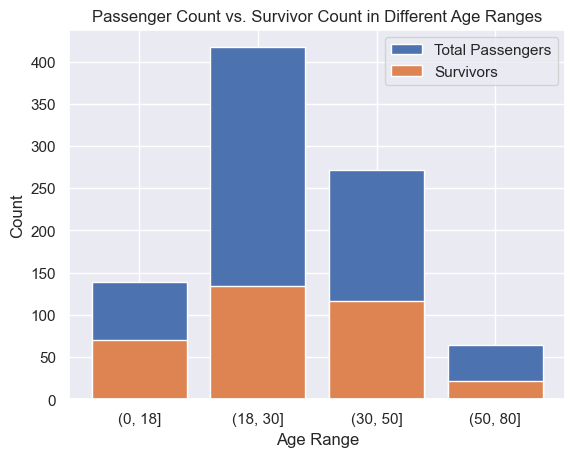

In [66]:
# Plot the counts of passengers in each age range
plt.bar(age_range_counts.index.astype(str), age_range_counts.values, label='Total Passengers')

# Plot the counts of survivors in each age range
plt.bar(survived_counts.index.astype(str), survived_counts.values, label='Survivors')

# Set labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Passenger Count vs. Survivor Count in Different Age Ranges')

# Add legend
plt.legend()

# Show the plot
plt.show()

<h3>Sibling, Spouse : Were the people who had siblings or spouse more survived who did not have?</h3><br>


In [68]:
# Count the number of passengers with SibSp
has_sibsp_count = df[df['SibSp'] > 0].shape[0]

# Count the number of passengers without SibSp
no_sibsp_count = df[df['SibSp'] == 0].shape[0]

# Print the counts
print('Passengers with SibSp:', has_sibsp_count)
print('Passengers without SibSp:', no_sibsp_count)

Passengers with SibSp: 283
Passengers without SibSp: 608


<h4>There are 283 who had siblings/spouse , 608 passenger who did not have siblings/spouse</h4>

In [73]:
# Group passengers by SibSp and calculate the count of survivors
survival_counts = df.groupby('SibSp')['Survived'].sum()

# Calculate the total count of passengers in each group
total_counts = df['SibSp'].value_counts()

# Calculate the survival percentage for each group
survival_percentage = (survival_counts / total_counts) * 100

# Print the survival percentages
for sibsp, percentage in survival_percentage.items():
    print(f'SibSp {sibsp}: {percentage:.2f}%')

SibSp 0: 34.54%
SibSp 1: 53.59%
SibSp 2: 46.43%
SibSp 3: 25.00%
SibSp 4: 16.67%
SibSp 5: 0.00%
SibSp 8: 0.00%


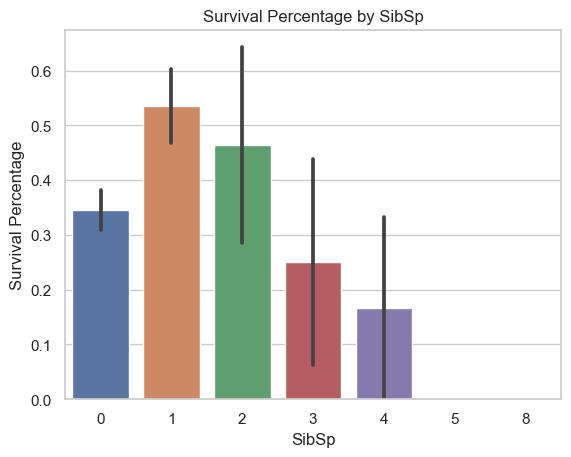

In [75]:
# Create a bar plot of SibSp vs Survival
sns.barplot(x='SibSp', y='Survived', data=df)

# Set labels and title
plt.xlabel('SibSp')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by SibSp')

# Show the plot
plt.show()

For those who had siblings,It appears that having a larger number of siblings/spouses (SibSp) is associated with a decreased chance of survival in the Titanic dataset. The chart shows that as the number of siblings/spouses increases, the survival percentage generally decreases.

<h3>Parents/Children : Were people with parents or children prioritized to be rescused( survived)?</h3><br>

Passengers with Different Parch Values:
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

Survivors with Different Parch Values:
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


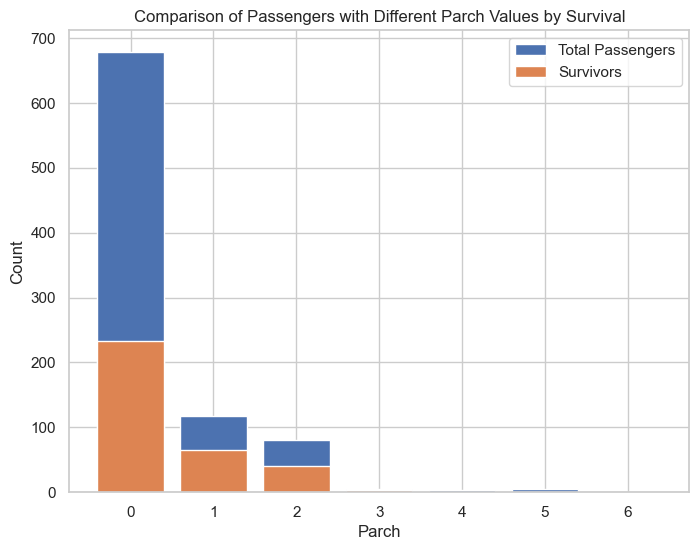

In [77]:
# Count the number of passengers with each value of Parch
parch_counts = df['Parch'].value_counts().sort_index()

# Count the number of survivors with each value of Parch
survived_counts = df[df['Survived'] == 1]['Parch'].value_counts().sort_index()

# Print the number of passengers with each value of Parch
print('Passengers with Different Parch Values:')
print(parch_counts)

# Print the number of survivors with each value of Parch
print('\nSurvivors with Different Parch Values:')
print(survived_counts)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the comparison
plt.bar(parch_counts.index.astype(str), parch_counts.values, label='Total Passengers')
plt.bar(survived_counts.index.astype(str), survived_counts.values, label='Survivors')

# Set labels and title
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Comparison of Passengers with Different Parch Values by Survival')

# Add legend
plt.legend()

# Show the plot
plt.show()


Based on the counts, it appears that there is a trend in the Titanic dataset where having a larger number of children/parents (Parch) is associated with a decreased chance of survival. 

<h4>For Data classification/analysis, we will include Sex, Pclass, Age, SibSp, Parch as the dependent variables</h4> 

In [86]:
#First label encode for Sex
# Manually label encode 'male' as 0 and 'female' as 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [148]:
# Define Dependent Variables and Independent variable
X = df[['Sex','Pclass','Age','SibSp','Parch']]
y = df['Survived']

In [149]:
X.head()

,Sex,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [150]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    int64  
 1   Pclass  891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [152]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [153]:
# Split the dataset into Traning and Testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=1)

In [154]:
# Print the shape of splitted data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 5)
(712,)
(179, 5)
(179,)


<h2>Explore different Classification methods(Perceptron, Logistic Regression,SVM, Decision Tree,Random Forest)</h2>

<h3>Perceptron</h3>

In [155]:
ppn = Perceptron(max_iter=200,eta0=0.1, random_state=1)
#default max_iter is 100, now we try with 200, the result doesn't imporve
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=200, random_state=1)

In [156]:
y_pred_ppn = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_ppn).sum())

Misclassified examples: 65


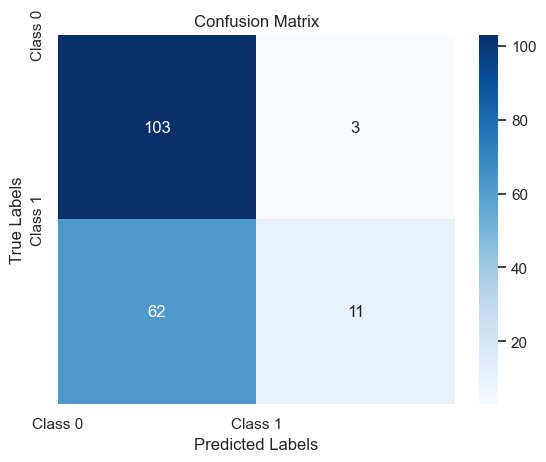

In [157]:
cm = confusion_matrix(y_test, y_pred_ppn)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Show the plot
plt.show()

In [244]:
accuracy_ppn = accuracy_score(y_test, y_pred_ppn)
print(accuracy_ppn)

0.6368715083798883


In [162]:
report = classification_report(y_test, y_pred_ppn)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       106
           1       0.79      0.15      0.25        73

    accuracy                           0.64       179
   macro avg       0.70      0.56      0.51       179
weighted avg       0.69      0.64      0.55       179



<h3>Logistic Regression</h3>

In [163]:
#create model 
#LR_model=LogisticRegression()
LR_model = LogisticRegression(max_iter=200, random_state=1, solver='liblinear')
#default max_iter is 100, now we try with 200, the result doesn't imporve

#fit the model
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=1, solver='liblinear')

In [166]:
#predict the model
y_pred_lr=LR_model.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_lr).sum())

Misclassified examples: 37


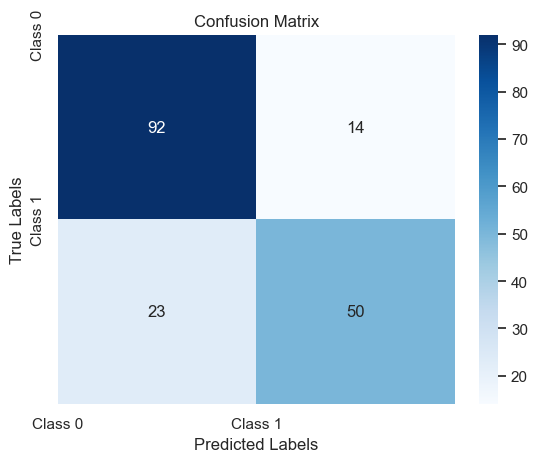

In [167]:
cm = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Show the plot
plt.show()

In [245]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)

0.7932960893854749


In [170]:
report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       106
           1       0.78      0.68      0.73        73

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



<h3>Support Vector Machine</h3>

In [239]:
# Create an SVM classifier
#svm = SVC()#72
svm = SVC(kernel='linear', C=1.0, random_state=1) #Misclassified examples: 40
#svm = SVC(kernel='sigmoid', C=1.0, random_state=1) #Misclassified examples: 92
#svm = SVC(kernel='rbf', C=1.0, random_state=1) #Misclassified examples: 72
#svm = SVC(kernel='poly', C=0.5, random_state=40)#Misclassified examples: 71

# Train the classifier
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [240]:
#predict the model
y_pred_svm=svm.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_svm).sum())

Misclassified examples: 40


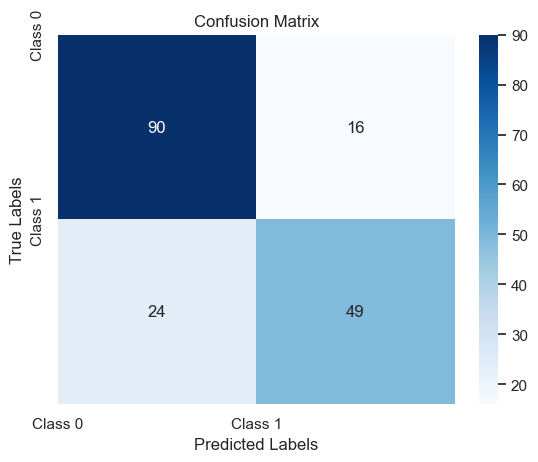

In [241]:
cm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Show the plot
plt.show()

In [246]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

0.776536312849162


In [243]:
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



<h3>Decision Tree</h3>


In [251]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1) #Misclassified examples: 38
#tree_model = DecisionTreeClassifier(criterion='entropy',random_state=1)#Misclassified examples: 40

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [252]:
#predict the model
y_pred_dt=tree_model.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_dt).sum())

Misclassified examples: 38


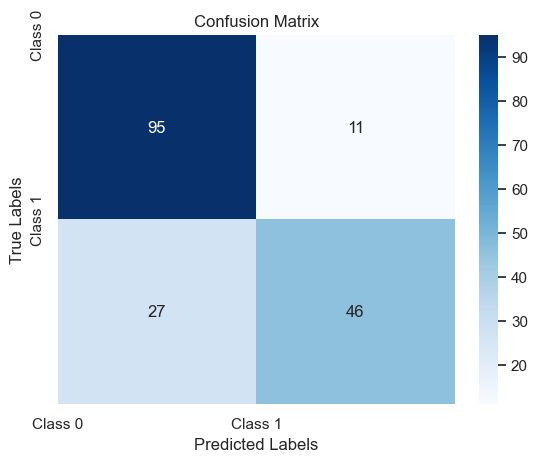

In [253]:
cm = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Show the plot
plt.show()

In [254]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.7877094972067039


In [255]:
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       106
           1       0.81      0.63      0.71        73

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



<h3>Random Forest</h3>

In [264]:
forest = RandomForestClassifier(criterion='gini', n_estimators=300,random_state=1,n_jobs=2)#42
#forest = RandomForestClassifier(criterion='entropy', n_estimators=150,random_state=1,n_jobs=2)#42

forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=2, random_state=1)

In [265]:
#predict the model
y_pred_rf=forest.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_rf).sum())

Misclassified examples: 42


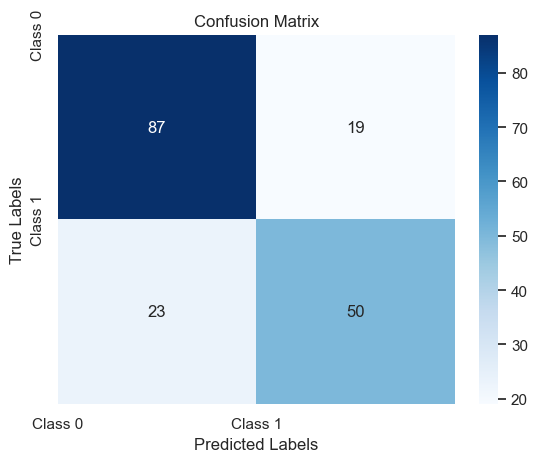

In [266]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Show the plot
plt.show()

In [267]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.7653631284916201


In [268]:
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       106
           1       0.72      0.68      0.70        73

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



<h3>Model Evaluation</h3>
-Confusion matrix<br>
-The confusion matrix provides information about the model's performance by showing the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) predictions made by the model.<br><br>
-precision = true positives / (true positives + false positives)<br>
-recall = true positives / (true positives + false negatives)<br>
-F1 score = 2 * (precision * recall) / (precision + recall)<br>
-The support is the number of occurrences of each class in y_true.<br>

<br>
<b>Models are built with differnt parameter values. It is shown that the accuracy of Logistic regression is higher than other models. </b>

<h3>Model Evaluation with Root Mean Squared Error (RMSE)</h3><br>
RMSE is a measure of the model's prediction error. A lower RMSE indicates better accuracy and a smaller average difference between the predicted and actual values

In [273]:
from sklearn.metrics import mean_squared_error

rmse_ppn = np.sqrt(mean_squared_error(y_test, y_pred_ppn))
print("RMSE of Perceptron",mse_ppn)
      
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE of Logistic Regression",mse_lr)
      
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print("RMSE of SVM",mse_svm)
      
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE of Decision Tree",mse_dt)
      
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of Ramdom forest",mse_rf)

RMSE of Perceptron 0.6026014367889541
RMSE of Logistic Regression 0.454647017602145
RMSE of SVM 0.47271945924706543
RMSE of Decision Tree 0.46074993520704494
RMSE of Ramdom forest 0.4843933025015725


RMSE of Logistic Regression is less than other models

<h3>Model Evaluation Visualization</h3>

In [278]:
accuracy = {"Perceptron":accuracy_ppn,"Logistic":accuracy_lr,
            "SVM":accuracy_svm,"Decision Tree":accuracy_dt,"Random Forest":accuracy_rf}
rmse={"Perceptron":rmse_ppn,"Logistic":rmse_lr,
            "SVM":rmse_svm,"Decision Tree":rmse_dt,"Random Forest":rmse_rf}


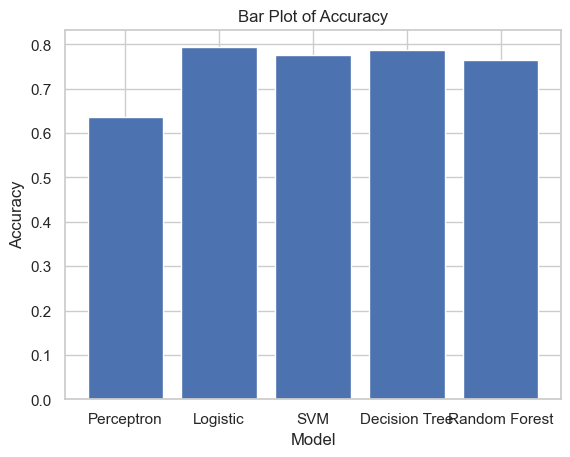

In [280]:
labels = list(accuracy.keys())
values = list(accuracy.values())

# Create a bar plot
plt.bar(labels, values)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Bar Plot of Accuracy')

# Show the plot
plt.show()

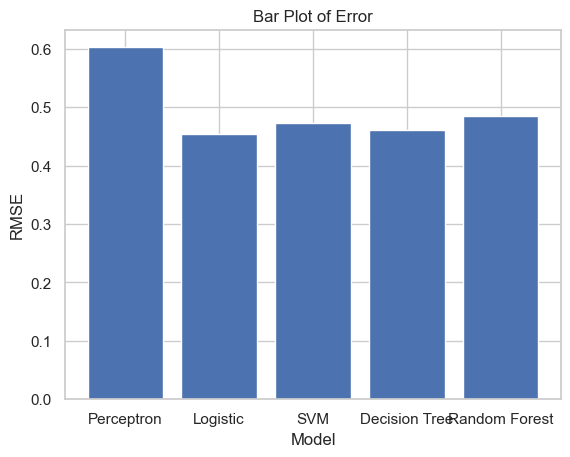

In [281]:
labels = list(rmse.keys())
values = list(rmse.values())

# Create a bar plot
plt.bar(labels, values)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Bar Plot of Error')

# Show the plot
plt.show()

<b>For titanic dataset using Sex, Pclass, Age, SibSp, Parch as independent variables, it is shown that Logistic regression model is more accurate and lower error than other models.</b>

<h3>Save the Model</h3>
-Here Logistic Regression Model is saved as sample for model deployment

In [186]:
# Import Joblib Module from Scikit Learn

import joblib
# Save RL_Model to file in the current working directory

joblib_file = "Titanic_LR_Model.pkl"  
joblib.dump(LR_model, joblib_file)

['Titanic_LR_Model.pkl']

In [187]:
Titanic_LR_Model = joblib.load("Titanic_LR_Model.pkl")


Titanic_LR_Model

LogisticRegression(max_iter=200, random_state=1, solver='liblinear')

In [192]:
g=(int)(input("Input your Gender( 0 for Male, 1 for Female) : "))
pclass=(int)(input("Input your Class( 1 for 1st class, 2 for 2nd class, 3 for 3rd class :"))
age=(int)(input("Input age : "))
sib=(int)(input("Input your number of siblings(1,2,3,4...) or Input 1 if you have spouse : "))
parch=(int)(input("Input parents or childern number :"))

data=[g,pclass,age,sib,parch]

result=Titanic_LR_Model.predict([data])

print("------------------------")
if result==0:
    print("Not survived")
else:
    print("Survived")

print("------------------------")


Input your Gender( 0 for Male, 1 for Female) : 1
Input your Class( 1 for 1st class, 2 for 2nd class, 3 for 3rd class :3
Input age : 30
Input your number of siblings(1,2,3,4...) or Input 1 if you have spouse : 3
Input parents or childern number :2
------------------------
Not survived
------------------------


/Users/nawchittoojune/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
